# Изучение закономерностей, определяющих успешность игр

### Описание проекта
**Заказчик:** 
интернет-магазин компьютерных игр «Стримчик», который продаёт по всему миру компьютерные игры. 

**Источник данных:** 
открытые источники с истоическими данными о продажах игр, оценками пользователей и экспертов, жанрами и платформами (например, Xbox или PlayStation). В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:** 
используя исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы, выявить закономерности, определяющие успешность игры

### Описание данных
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### План исследования<a id='section_0'></a>
[Первый взгляд на данные](#section_1)
<br>[Предобработка данных](#section_2)
<br>[Вывод](#section_3)
<br>[Исследовательский анализ данных](#section_4)
- [Динамика развития игровой индустрии](#section_5)
- [Оценка жизненного цикла платформ](#section_6)
- [Выделение ТОП платформ для дальнейшего анализа](#section_7)
- [Распределение продаж игр на разных платформах](#section_8)
- [Выявление зависимости продаж и оценок](#section_9)
- [Распределение продаж игр по жанрам](#section_10)
- [Распределение продаж по регионам и платформам](#section_11)
- [Оценка влияния рейтинга ESRB на продажи в регионах](#section_12)

[Портрет пользователя](#section_13)
<br>[Статистическая проверка гипотез](#section_14)
<br>[Вывод](#section_15)

### Первый взгляд на данные<a id='section_1'></a>
[к плану исследования](#section_0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df = pd.read_csv('/datasets/games.csv')

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


### Предобработка данных<a id='section_2'></a>
[к плану исследования](#section_0)

In [5]:
# создадим функцию для приведения строковых значений к нижнему регистру
def to_str_lower(df, column):
    for col in column:
        df[col] = df[col].str.lower()
    df.columns=df.columns.str.lower()
    return df

In [6]:
# приведем к нижнему регистру названия столбцов и строковые значения в таблице
df.pipe(to_str_lower, ['Name', 'Platform', 'Genre'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.000,sports,41.360,28.960,3.770,8.450,76.000,8,E
1,super mario bros.,nes,1985.000,platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,mario kart wii,wii,2008.000,racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,wii sports resort,wii,2009.000,sports,15.610,10.930,3.280,2.950,80.000,8,E
4,pokemon red/pokemon blue,gb,1996.000,role-playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.000,action,0.000,0.000,0.010,0.000,nan,NaN,NaN
16711,lma manager 2007,x360,2006.000,sports,0.000,0.010,0.000,0.000,nan,NaN,NaN
16712,haitaka no psychedelica,psv,2016.000,adventure,0.000,0.000,0.010,0.000,nan,NaN,NaN
16713,spirits & spells,gba,2003.000,platform,0.010,0.000,0.000,0.000,nan,NaN,NaN


In [7]:
# оценим строки, содержащие значения 'tbd'
df.query("user_score == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.000,sports,3.450,2.590,0.000,0.660,nan,tbd,E
301,namco museum: 50th anniversary,ps2,2005.000,misc,2.080,1.350,0.000,0.540,61.000,tbd,E10+
520,zumba fitness 2,wii,2011.000,sports,1.510,1.030,0.000,0.270,nan,tbd,T
645,udraw studio,wii,2010.000,misc,1.650,0.570,0.000,0.200,71.000,tbd,E
657,frogger's adventures: temple of the frog,gba,nan,adventure,2.150,0.180,0.000,0.070,73.000,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.000,action,0.010,0.000,0.000,0.000,67.000,tbd,E
16697,bust-a-move 3000,gc,2003.000,puzzle,0.010,0.000,0.000,0.000,53.000,tbd,E
16698,mega brain boost,ds,2008.000,puzzle,0.010,0.000,0.000,0.000,48.000,tbd,E
16704,plushees,ds,2008.000,simulation,0.010,0.000,0.000,0.000,nan,tbd,E


Обратим внимание на значение tbd в столбце с оцеками пользователей. Сама по себе аббревиатура TBD (to be determined) переводится как 'будет определено'. Можем предположить, что для определения пользовательского рейтинга не хватило данных для определения значения. Следовательно, будем считать эти значения эквивалетными пропускам.

In [8]:
# очистим столбец от значений tbd для дальнейшей обработки
df.loc[df['user_score'] == 'tbd', 'user_score'] = df.loc[df['user_score'] == 'tbd', 'user_score'].replace('tbd',np.NaN)
df['user_score'] = df['user_score'].astype(float)

In [9]:
# сформируем премежуточный фрейм для заполнения пропусков в оценках игр, по которым имеются данные на других платформах
score_mean = df.groupby('name')['critic_score', 'user_score'].mean()
score_mean.sample(5)

,critic_score,user_score
name,,
empire earth ii,79.000,7.100
rocksmith 2014,nan,nan
bust-a-move ds,75.000,7.000
quiz magic academy ds,nan,nan
popeye: rush for spinach,48.000,4.200


In [10]:
# заменим пропуски оценок имеющимися средними знаечениями для каждой из игр на других платформах
df['user_score'] = df['user_score'].fillna(df['name'].map(score_mean['user_score']))
df['critic_score'] = df['critic_score'].fillna(df['name'].map(score_mean['critic_score']))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       9098 non-null float64
user_score         8689 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [11]:
# выполним первичную обработку данных: 
# заполним пропуски, приведем к соотвествующим типам данных, удалим некоторые пропуски
df = df.\
assign(
    year_of_release = lambda x: x['year_of_release'].fillna(0).astype(int),
    critic_score = lambda x: x['critic_score'].fillna(0).astype(int),
    user_score = lambda x: (x['user_score'].fillna(0).astype(float)*10).astype(int), # Привели в единую шкалу оценки
    rating = lambda x: x['rating'].fillna(0)
    ).dropna(subset = ['name'])

In [12]:
# проверим на наличие пустых значений
df[df.isna().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [13]:
# после преобразований проверим наличие дубликатов
df.duplicated().sum()

0

In [14]:
# посчитаем суммарные (глоабальные )продажи и выведем их в новый столбец
df['total_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.360,28.960,3.770,8.450,76,80,E,82.540
1,super mario bros.,nes,1985,platform,29.080,3.580,6.810,0.770,0,0,0,40.240
2,mario kart wii,wii,2008,racing,15.680,12.760,3.790,3.290,82,83,E,35.520
3,wii sports resort,wii,2009,sports,15.610,10.930,3.280,2.950,80,80,E,32.770
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270,8.890,10.220,1.000,0,0,0,31.380


### Вывод<a id='section_3'></a>
[к плану исследования](#section_0)
На этапе предобработки мы поработали над сведением строковых значений к нижнему регистру, в т.ч. привели к нижнему регистру и названия столбцов.

Также, мы столкнулись с пропусками, небольшую часть из которых нам удалось заменить. Но, большая часть пропусков содержится в данных с оценками критиков и пользователей - порядка 50% и 40% соотвественно. Замена такого количества пропусков грозит существенным искажением дальнейших расчетов и интерерпретацией конечных выводов. Поэтому, было принято решение сначала заполнить пропуски средними оценками для каждой из игр на другой платформе(если они есть), оставшиеся пропуски заполнили нулевыми значениями (они являются маркерами, т.к. являются уникальными в своих столбцах). В дальнейшей работе будем применять срезы данных (без пропусков) для решения тех или иных задач. 

В качестве примечания отметим, что причиной пропусков является отсутствие соответствующей информации, т.к. предположительно информация агрегировалась из разных источников. Также, вероятной причиной могли стать разные системы оценки игр или вовсе их отстствтие в определенные промежутки времмени, учитывая, что текущий датафрейм содержит информацию за 26 лет. Возможно, игры просто оказались непопуларные и остались без рейтинга.

С целью унификации шкалы оценки игр мы привели шкалу пользовательских оценок к шкале оценки критиков  - преобразовали оба столбца к целочисленному типу данных. Значения годов выпуска игр мы также привели к типу 'int'.

## Исследовательский анализ данных<a id='section_4'></a>

### Динамика развития игровой индустрии<a id='section_'></a>
[к плану исследования](#section_0)

Посмотрим, сколько игр выпускалось в разные годы и определим актуальный приеод для дальнейшего анализа.

In [15]:
# построим таблицу для анализа количества выпускаемых игр в год 
games_per_yaer = df.query('year_of_release > 0').pivot_table(index='year_of_release', values='name', aggfunc='nunique')
games_per_yaer.columns = ['games_count', 'years_count']
games_per_yaer = games_per_yaer['games_count'].to_frame()
games_per_yaer.head()

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


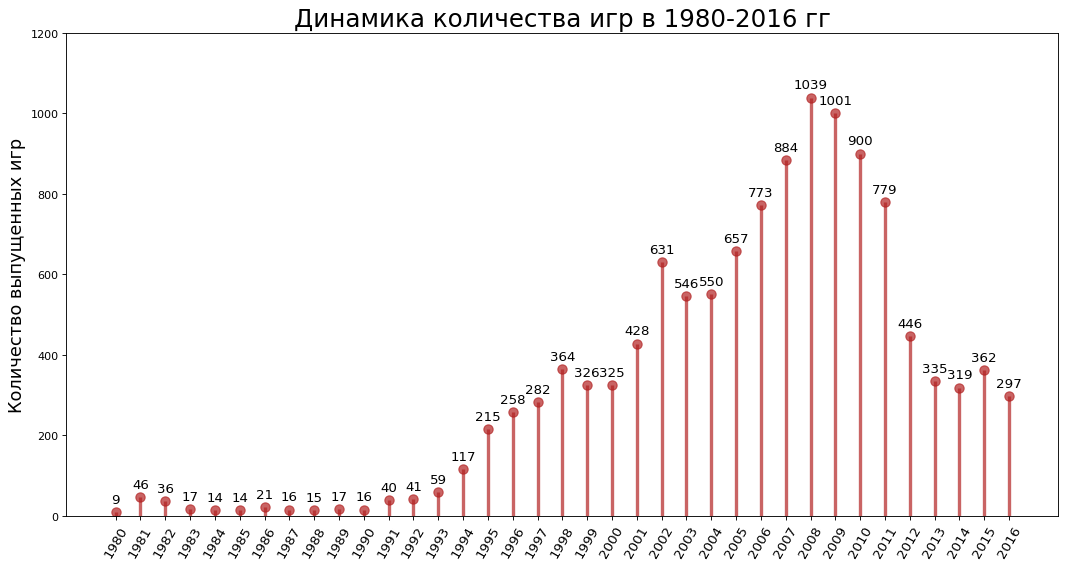

In [16]:
#создадим гистограмму для оценки динамикаи выпуска игр
fig, ax = plt.subplots(figsize=(16,8), dpi=80)
ax.vlines(x=games_per_yaer.index, ymin=0, ymax=games_per_yaer.games_count, color='firebrick', alpha=0.7, linewidth=3)
ax.scatter(x=games_per_yaer.index, y=games_per_yaer.games_count, s=70, color='firebrick', alpha=0.7)

ax.set_title('Динамика количества игр в 1980-2016 гг', fontdict={'size':22})
ax.set_ylabel('Количество выпущенных игр', fontdict={'size':16})
ax.set_xticks(games_per_yaer.index)
ax.set_xticklabels(games_per_yaer.index, rotation=60, fontdict={'size':12})
ax.set_ylim(0,1200)


for row in games_per_yaer.itertuples():
    ax.text(row.Index, row.games_count+15, s=row.games_count, horizontalalignment='center', 
            verticalalignment='bottom', fontsize=12)

plt.show()

Гистограмма наглядно демонстрирует нам начало резкого роста релизов игр начиная с 1994 года.
Пик популярности компьютерных игр пришелся на 2007-2008 года, после чего их количество выпуска пошло на спад.
Для дальнейшего анализа нам вряд ли пригодятся данные до 1995 года, т.к. количество выпущенных игр в год за этот период весьма мал, да и скорее всего игры 20-летней давности имеют мало общего с продуктами, которые выпускаются на сегодняшний день. 
Будем считать 1995 год началом развития индустрии развития компьютерных игр, поэтому в дальнейшем анализе будем учитывать данные, которые имели место быть с 1995 года включительно.

In [17]:
# для дальнейшего анализ асоздадим список платформ с суммарными продажами > 100 млн $
top_sales_platform_years = df.query('year_of_release > 1994').\
    groupby('platform').agg({'total_sales':'sum'}).\
    sort_values(by='total_sales', ascending=False).query('total_sales > 100')

top_sales_platform_years

,total_sales
platform,
ps2,1233.560
x360,961.240
ps3,931.340
wii,891.180
ds,802.760
ps,721.550
ps4,314.140
gba,312.880
psp,289.530


### Оценка жизненного цикла платформ<a id='section_6'></a>
[к плану исследования](#section_0)

Для оценки жизненного цикал платфором построим вспомогательные датафреймы.

In [18]:
# для всех возможных комбинаций платформа-год сделайем фрейм с произведением в индексе 
platform_range = top_sales_platform_years.index
years_range = df.query('year_of_release > 1994')['year_of_release'].unique()
pd.MultiIndex.from_product([platform_range, years_range])

MultiIndex([('ps2', 2006),
            ('ps2', 2008),
            ('ps2', 2009),
            ('ps2', 1996),
            ('ps2', 2005),
            ('ps2', 1999),
            ('ps2', 2007),
            ('ps2', 2010),
            ('ps2', 2013),
            ('ps2', 2004),
            ...
            ( 'gb', 2011),
            ( 'gb', 1998),
            ( 'gb', 2015),
            ( 'gb', 2012),
            ( 'gb', 2014),
            ( 'gb', 1997),
            ( 'gb', 2016),
            ( 'gb', 2003),
            ( 'gb', 2000),
            ( 'gb', 1995)],
           length=352)

In [19]:
# Создадим вспомогательный фрейм, который будет содержать прямое произведение (cartesian product) всех платформ и годов
pltf_year_index = pd.DataFrame(index=pd.MultiIndex.from_product([platform_range, years_range])).reset_index()

pltf_year_index.columns = ['platform', 'year_of_release']

pltf_year_index

,platform,year_of_release
0,ps2,2006
1,ps2,2008
2,ps2,2009
3,ps2,1996
4,ps2,2005
...,...,...
347,gb,1997
348,gb,2016
349,gb,2003
350,gb,2000


In [20]:
# сформируем фрейм с имеющимися данными по наиболее популярным платформам с 1995 года
platform_stat_per_year = df.query('year_of_release > 1994 and platform in @platform_range').\
                                groupby(['platform','year_of_release']).\
                                agg(games_count = ('name', 'count'), 
                                    total_sales = ('total_sales', 'sum')).reset_index()

platform_stat_per_year.head(20)

,platform,year_of_release,games_count,total_sales
0,3ds,2011,116,63.200
1,3ds,2012,93,51.360
2,3ds,2013,91,56.570
3,3ds,2014,80,43.760
4,3ds,2015,86,27.780
5,3ds,2016,46,15.140
6,ds,2004,23,17.270
7,ds,2005,118,130.140
8,ds,2006,201,119.810
9,ds,2007,376,146.940


In [21]:
# соединим два созданных фрейма в один
platform_stat_all_years = pltf_year_index.\
    merge(platform_stat_per_year, on=['platform', 'year_of_release'], how='left').\
    assign(games_count = lambda x: x['games_count'].fillna(0).astype(int),
           total_sales = lambda x: x['total_sales'].fillna(0)).\
    sort_values(by=['platform', 'year_of_release']).reset_index()

In [22]:
platform_stat_all_years.head()

,index,platform,year_of_release,games_count,total_sales
0,219,3ds,1995,0,0.000
1,201,3ds,1996,0,0.000
2,215,3ds,1997,0,0.000
3,211,3ds,1998,0,0.000
4,203,3ds,1999,0,0.000


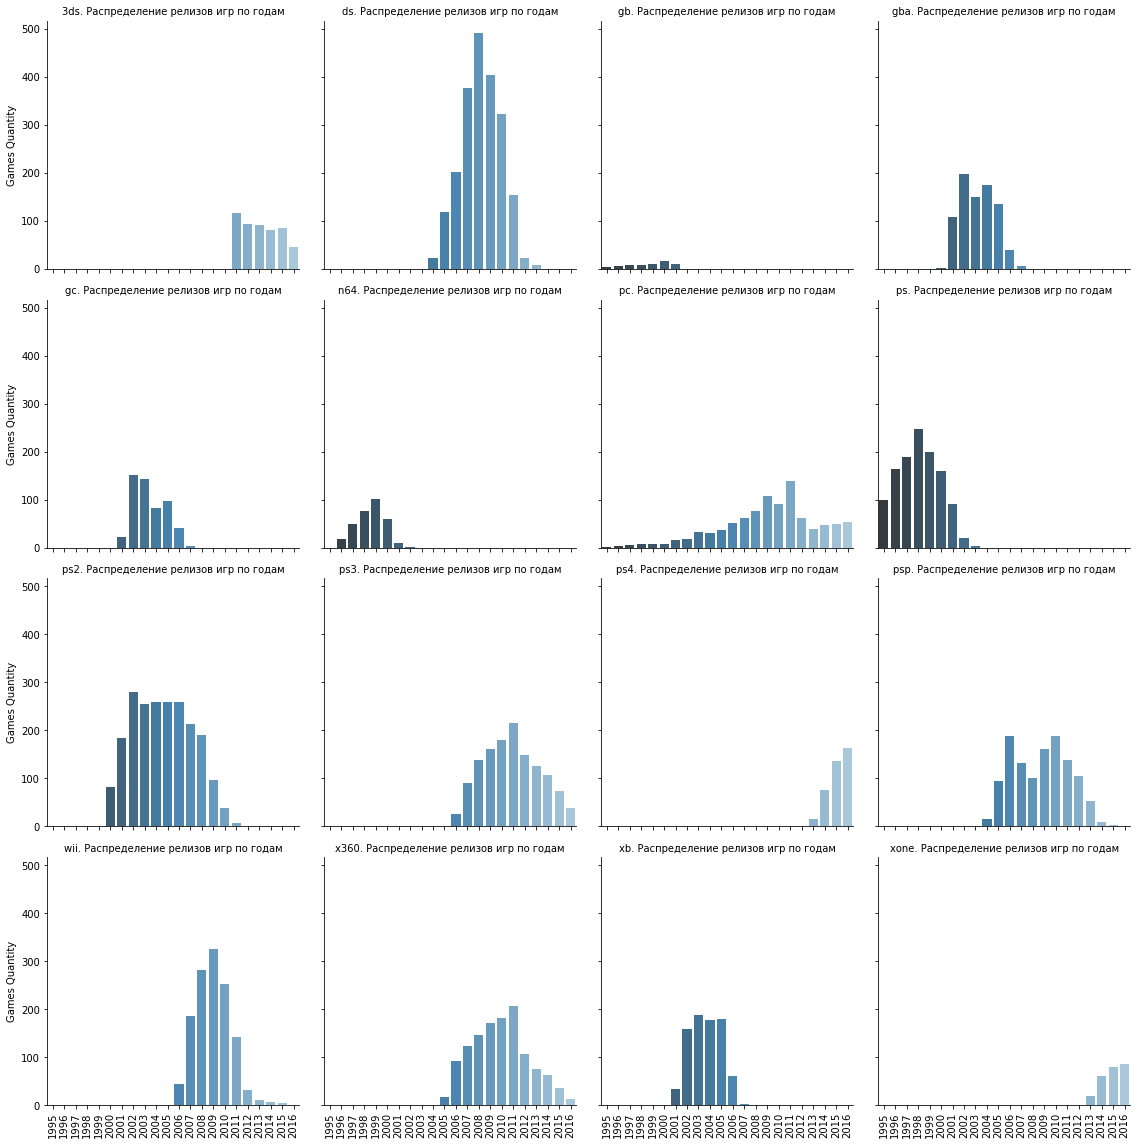

In [23]:
# посмотрим распределение количества игр по годам на разных платформах на основании созданного фрейма
g = sns.catplot(x='year_of_release', y='games_count', col='platform', col_wrap=4,
                data=platform_stat_all_years, kind='bar',
                height=4, palette='Blues_d')

(g.set_axis_labels('', 'Games Quantity')
  .set_titles('{col_name}. Распределение релизов игр по годам')
  .set_xticklabels(platform_stat_all_years.year_of_release, rotation=90, fontdict={'size':10}))
sns.set_style("darkgrid")
plt.show()

Распределение по годам дает начальное предсталение о наличии жизненного цикла каждой из платформ. Наша задача для дальнейщего прогноза определить платформы с наибольшим потенциалом. 
Основные критерии отбора платформ для дальнейшего прогноза:

- **игры на платформе выпускались за последний 2016 год**
- **количество выпущенных игр на платформе было существенным**

Гистограммы наглядно демонстрируют нам растущие платформы. В их числе:
- xone
- ps4

Исчезающие платформы - это предшественники растущих платформ:
- x360
- ps3

Стагнирующие платформы:
- pc
- 3ds (заметно потеряла популарность за 2016 год)

Все вышеперечисленные платформы вероятнее всего будут присутствовать в дальнейшем анализе. Отметим, что платформа 'x360' к 2016 году уже практически исчерпала себя. 

В следующем шаге определим актуальный период для построения прогноза и сформируем окончательный список актуальных платформ.

In [24]:
# определим продолжительность жизненного цикла "мертвых платформ"
dead_platforms = platform_stat_all_years.query('year_of_release == 2016 and games_count == 0')['platform'].reset_index(drop=True)

platform_life_cycle = platform_stat_per_year.query('platform in @dead_platforms').\
    groupby('platform').agg(life_cycle_years = ('year_of_release', 'count')).\
    sort_values(by='life_cycle_years', ascending=False)

print('Средняя продолжительность существования платформы: {:.0f} лет'.\
      format(platform_life_cycle['life_cycle_years'].mean()))
print('Диапазон жизненнго цикла: от {:.0f} до {:.0f} лет'.\
      format(platform_life_cycle['life_cycle_years'].min(), platform_life_cycle['life_cycle_years'].max()))

platform_life_cycle

Средняя продолжительность существования платформы: 9 лет
Диапазон жизненнго цикла: от 7 до 12 лет


,life_cycle_years
platform,
ps2,12
psp,12
ds,10
ps,9
xb,9
gba,8
gb,7
gc,7
n64,7


### Выделение ТОП платформ для дальнейшего анализа<a id='section_7'></a>
[к плану исследования](#section_0)

In [25]:
# определим ТОП платформ за последние годы
potential_platforms = platform_stat_per_year.\
    query('year_of_release > 2013 and games_count > 0')[['platform', 'games_count', 'total_sales']].\
    groupby(['platform']).sum().\
    sort_values(by='total_sales', ascending=False).head(6).reset_index()

potential_platforms

,platform,games_count,total_sales
0,ps4,376,288.150
1,xone,228,140.360
2,3ds,212,86.680
3,ps3,219,68.180
4,x360,111,48.220
5,pc,151,27.050


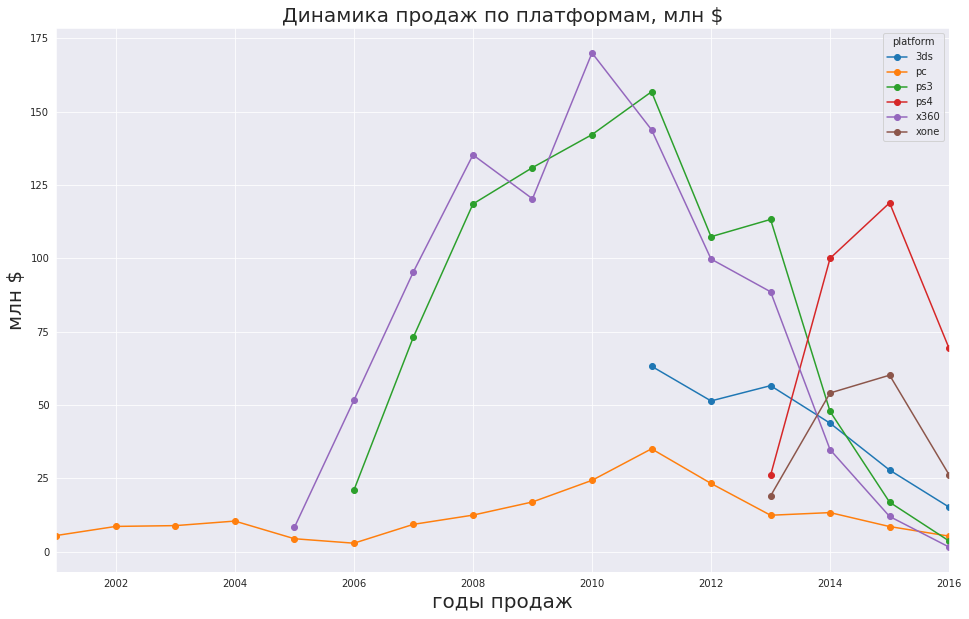

In [26]:
# построим распределение продаж по годам в разрезе платформ
df.query('year_of_release > 2000 and platform in @potential_platforms.platform').pivot_table(index='year_of_release', 
                                                                  columns='platform', 
                                                                  values='total_sales', 
                                                                  aggfunc='sum').\
plot(figsize=(16, 10), style='-o', grid=True)
plt.title('Динамика продаж по платформам, млн $', size=20)
plt.xlabel('годы продаж', size=20)
plt.ylabel('млн $', size=20)
plt.show()

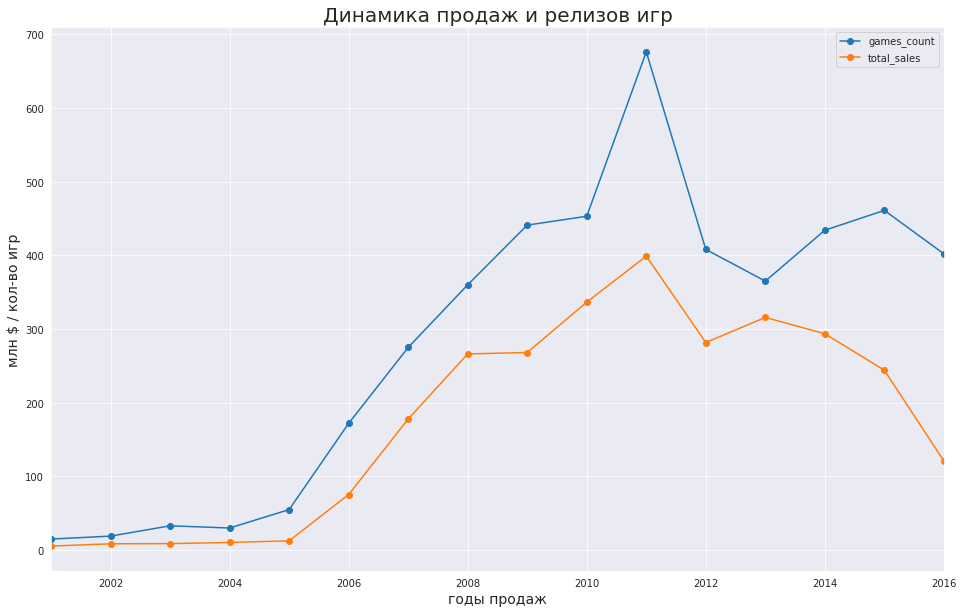

In [27]:
# сопоставим динамику продаж и выпуска игр
platform_stat_per_year.query('year_of_release > 2000 and platform in @potential_platforms.platform').\
    pivot_table(index='year_of_release', 
                values=('total_sales', 'games_count'),
                aggfunc='sum').plot(figsize=(16, 10), style='-o', grid=True)

plt.title('Динамика продаж и релизов игр', size=20)
plt.xlabel('годы продаж', size=14)
plt.ylabel('млн $ / кол-во игр', size=14)
plt.show()

В целом для всех платформ 2016 год ознаменовался падением продаж на фоне снижения популярности компьютерных игр. Как видим из графика динами глобальных продаж и релизов, между этими двумя показателями наблюдаестя сильная связь. Это затронуло все без исключения игровые платформы (график - Динамика продаж по платформам, млн $).

В качестве актуального периода, на основании которого можно будет построить прогноз возьмем последние 3 года (2014-2016), т.к. именно с 2014 года наблюдается существенный рост выпуска игр на лидирующих сейчас платформах XOne и PS4. Это заметно из графика распределения количества релизов игр по годам.

Для дальнейшего анализа возьмем ТОП-6 платформ для продаж за последние 3 года (2014-2016).

### Распределение продаж игр на разных платформах<a id='section_8'></a>
[к плану исследования](#section_0)

In [28]:
# сохраним актуальные данные по платформам в отдельный фрейм
actual_df = df.query('year_of_release > 2013 and platform in @potential_platforms.platform').reset_index(drop=True)
actual_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,call of duty: black ops 3,ps4,2015,shooter,6.030,5.860,0.360,2.380,0,0,0,14.630
1,grand theft auto v,ps4,2014,action,3.960,6.310,0.380,1.970,97,83,M,12.620
2,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.350,3.490,3.100,0.740,0,0,0,11.680
3,fifa 16,ps4,2015,sports,1.120,6.120,0.060,1.280,82,43,E,8.580
4,star wars battlefront (2015),ps4,2015,shooter,2.990,3.490,0.220,1.280,0,0,0,7.980


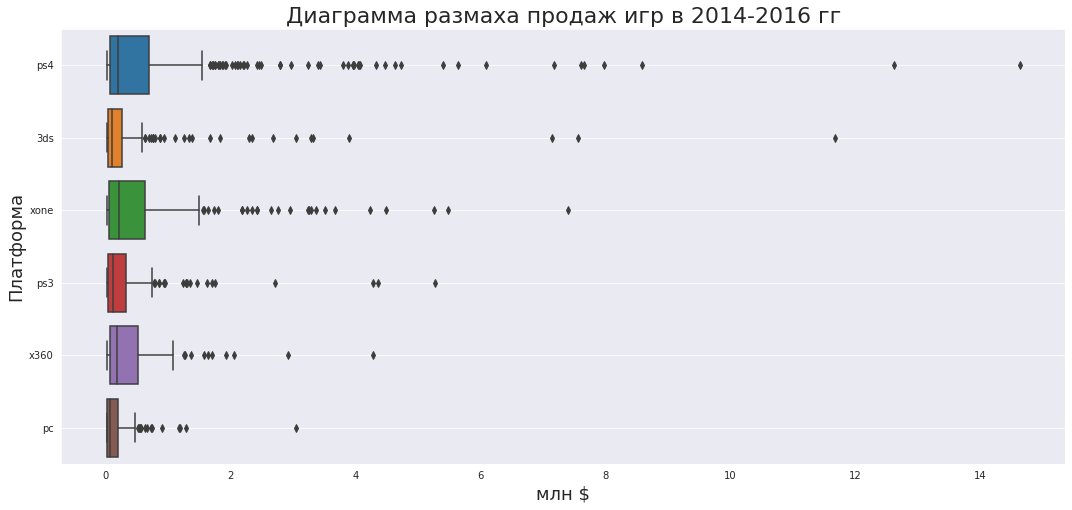

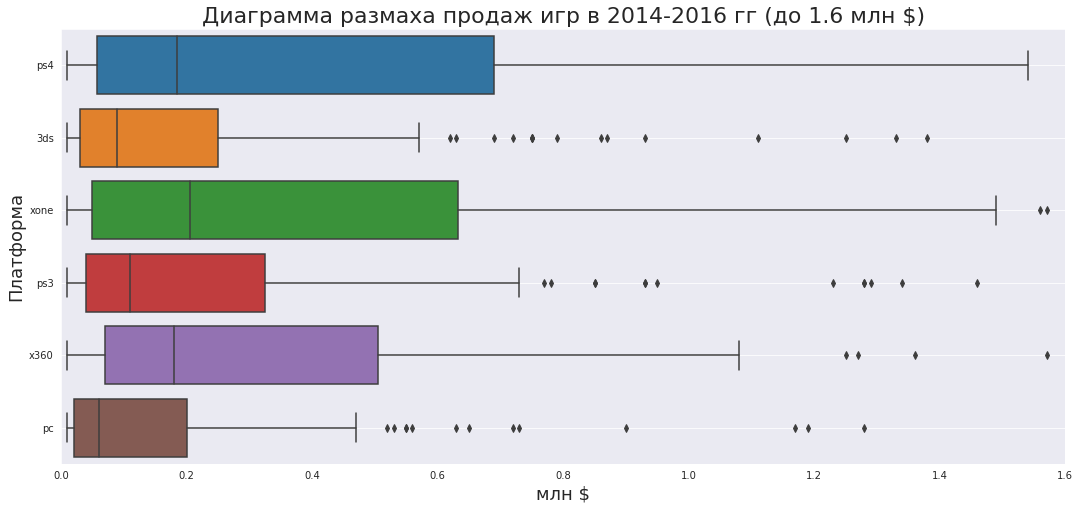

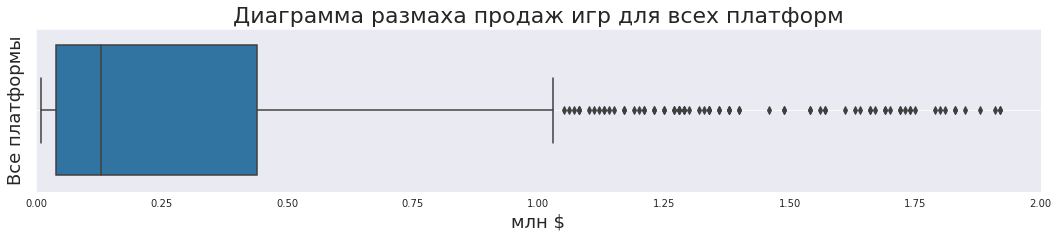

In [29]:
# оценим ситуацию с размахом продаж и выбросами в общем и на каждой из платформ
plt.figure(figsize=(18,8))
sns.boxplot(y='platform', x='total_sales', data=actual_df, orient='h')
plt.grid()
plt.title('Диаграмма размаха продаж игр в 2014-2016 гг', fontsize=22)
plt.xlabel('млн $', fontsize=18)
plt.ylabel('Платформа', fontsize=18)
plt.show()

plt.figure(figsize=(18,8))
sns.boxplot(y='platform', x='total_sales', data=actual_df, orient='h')
plt.grid()
plt.title('Диаграмма размаха продаж игр в 2014-2016 гг (до 1.6 млн $)', fontsize=22)
plt.xlabel('млн $', fontsize=18)
plt.ylabel('Платформа', fontsize=18)
plt.xlim(0,1.6)
plt.show()

plt.figure(figsize=(18,3))
sns.boxplot(x='total_sales', data=actual_df, orient='h')
plt.grid()
plt.title('Диаграмма размаха продаж игр для всех платформ', fontsize=22)
plt.xlabel('млн $', fontsize=18)
plt.ylabel('Все платформы', fontsize=18)
plt.xlim(0,2)
plt.show()

In [30]:
# помотрим на средние и медианные значения продаж каждой из игры на разных плаформах
actual_df.groupby('platform').agg({'total_sales' : ['mean', 'median']})

total_sales       
                mean median
platform                   
3ds            0.409  0.090
pc             0.179  0.060
ps3            0.311  0.110
ps4            0.766  0.185
x360           0.434  0.180
xone           0.616  0.205

График распределения без установления лимитов демонстрирует, что практически на каждой из рассматриваемых платформ имеются выбросы в виде популярных игр, которые отличались высокими продажами. Это подверждает существенное превышение средних значений на каждой из платформ над медианой.

Можем отметить, что на топовых платформах ps4 и xone средние продажи сопоставимы, в то время как продажи игр на других платформах (в том числе и предшественниках лидеров) в среднем составили 0.2-0.4 млн долл, тогда как у лидера по продажам ps4 - этот средний показатель продажи за игру близок к 0.8 млн долл, а у второй по суммарным продажам плоатформы - более 0.6 млн долл. 

Но, как уже было описано выше, на графике количество игр, продажи которых лежат  за пределами "усов" на платформе PS4 заметно больше. Похоже, что как раз этот фактор и сказывается на лидерских позициях платформы PS4 в последние годы.

### Выявление зависимости продаж и оценок<a id='section_9'></a>
[к плану исследования](#section_0)

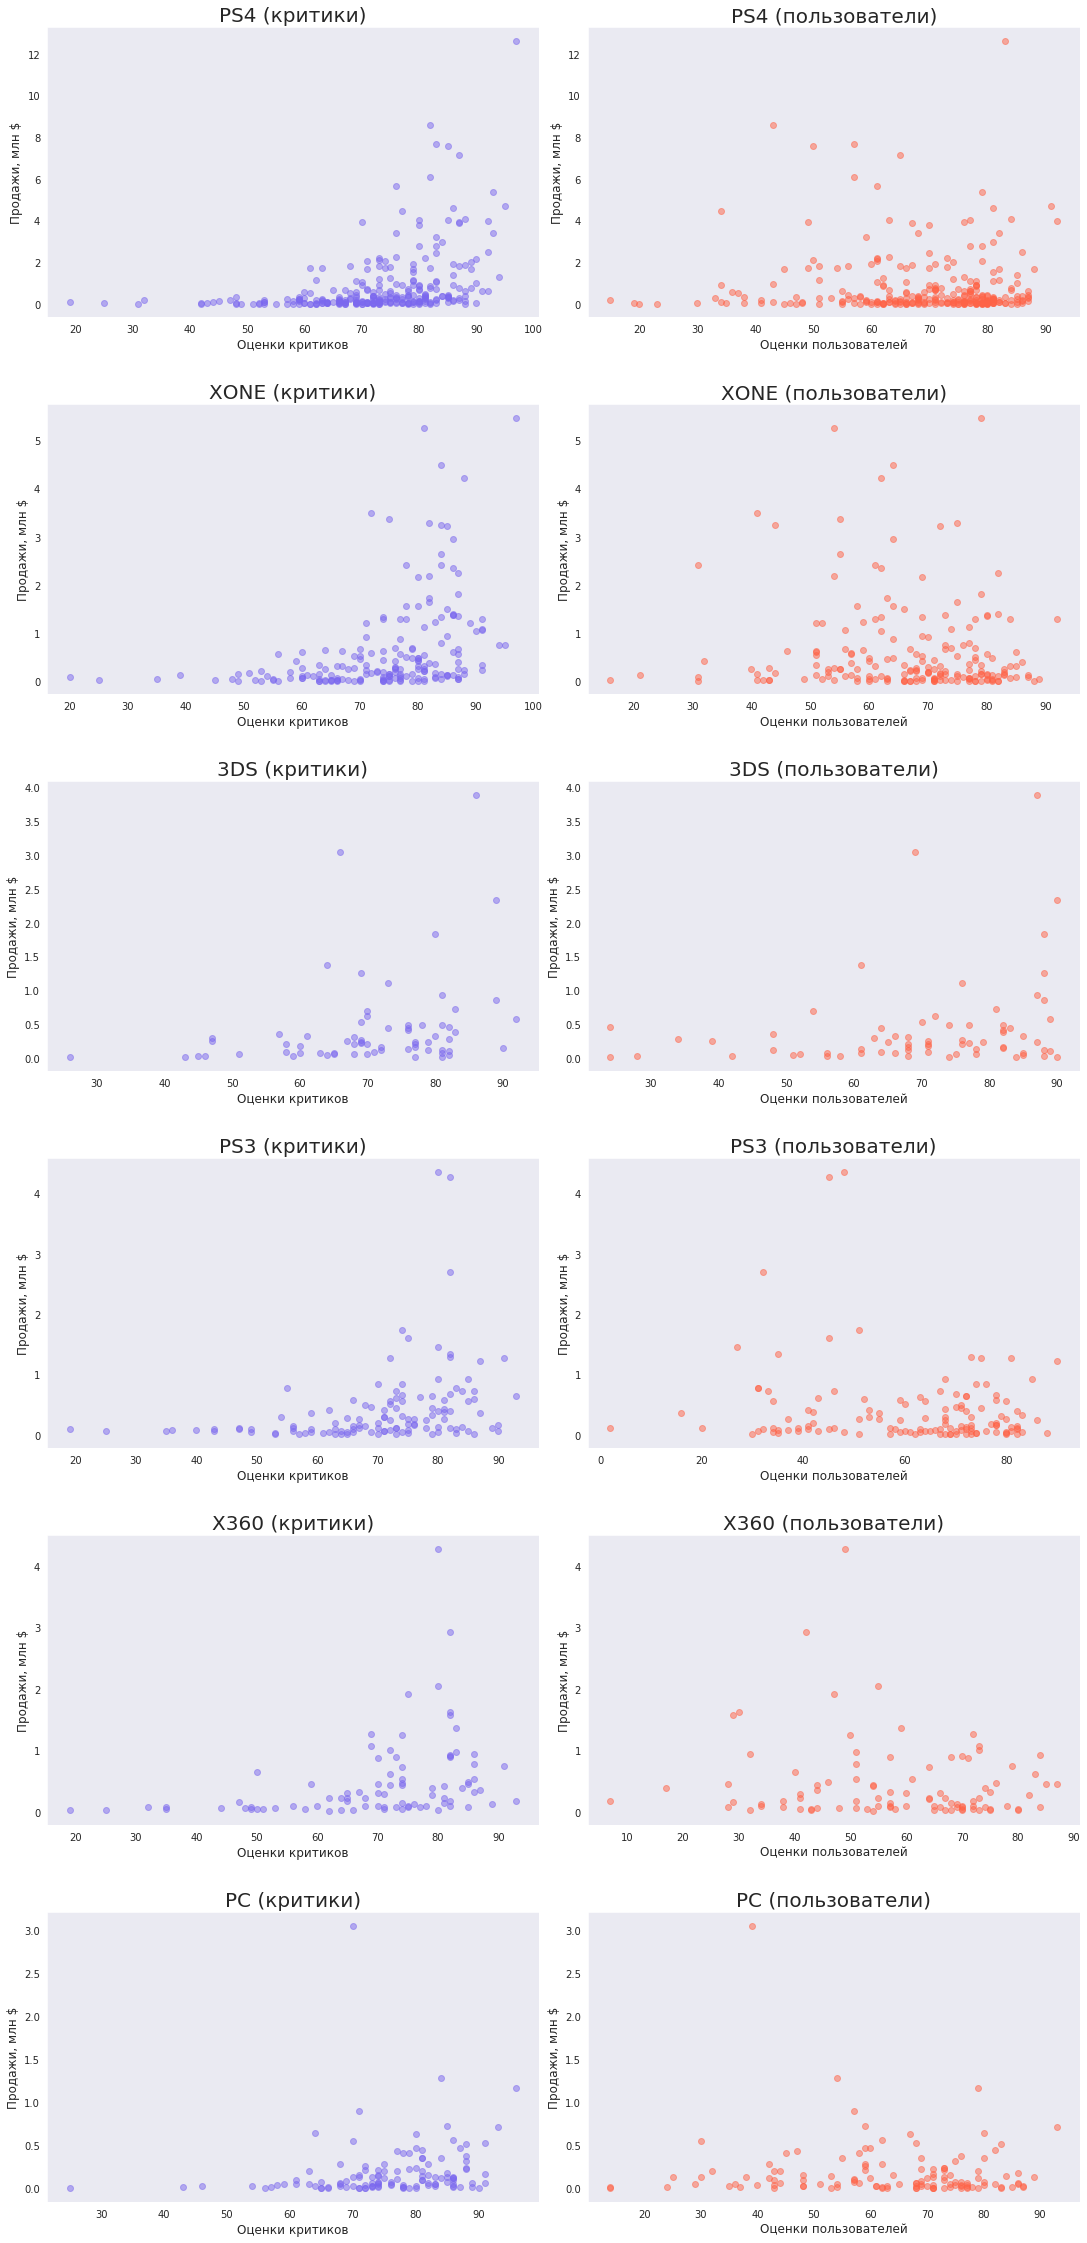

In [31]:
# построим точчные графики для визуальной оценки зависимости продаж от отзывов
fig, ax = plt.subplots(6,2)
ax = ax.flatten()
fig.set_size_inches(18.5, 40)
plt.subplots_adjust(wspace=0.1, hspace=0.3)

num_of_subplot = 0

for pltf in potential_platforms['platform']:
    ax[num_of_subplot].scatter('critic_score', 'total_sales', c='mediumslateblue', data=actual_df.query("critic_score > 0 and platform == @pltf"), alpha=0.5)
    ax[num_of_subplot].set_title(pltf.upper()+' (критики)', fontsize=20)
    ax[num_of_subplot].set_xlabel('Оценки критиков', fontsize=12)
    ax[num_of_subplot].set_ylabel('Продажи, млн $', fontsize=12)
    ax[num_of_subplot].grid()
    num_of_subplot += 1
    
    ax[num_of_subplot].scatter('user_score', 'total_sales', c='tomato', data=actual_df.query("user_score > 0 and platform == @pltf"), alpha=0.5)
    ax[num_of_subplot].set_title(pltf.upper()+' (пользователи)', fontsize=20)
    ax[num_of_subplot].set_xlabel('Оценки пользователей', fontsize=12)
    ax[num_of_subplot].set_ylabel('Продажи, млн $', fontsize=12)
    ax[num_of_subplot].grid()
    num_of_subplot += 1

In [32]:
# расчитаем линейный коэф.кор.Пирсона
actual_df[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000,0.170,0.079
critic_score,0.170,1.000,0.873
user_score,0.079,0.873,1.000


При рассмотрении линейного коэффициента корреляции для всех значений (включая отсутствующие оценки) можно отметить высокую взаимосвязь между оценками критиков и пользователей, в то время как с продажами оценки практически не связаны. 

Рассмотрение связи с отсуствующими(нулевыми) значениям может показать некую зависимость и позволяет выдвинуть гипотезу, что для большинства игр с отсутствующими отзывами характерны низкие продажи. 

Посмотрим как изменятся значения для аналогичных НЕнулевых значений очищенных от выбросов (за выборсы мы приняли игры с продажами более 1 млн $ исходя из значений боксплота изображенного выше). 

In [33]:
# расчитаем линейный коэф.кор.Пирсона для игр по которым есть данные по рейтингу
print(actual_df.query('total_sales < 1 and critic_score > 0')[['total_sales', 'critic_score']].corr())
print(actual_df.query('total_sales < 1 and user_score > 0')[['total_sales', 'user_score']].corr())
print(actual_df.query('critic_score > 0 and user_score > 0')[['critic_score', 'user_score']].corr())

              total_sales  critic_score
total_sales         1.000         0.322
critic_score        0.322         1.000
             total_sales  user_score
total_sales        1.000       0.035
user_score         0.035       1.000
              critic_score  user_score
critic_score         1.000       0.421
user_score           0.421       1.000


Видим, что выбросы оказывали существенное влияние на расчет корреляции продаж и оценки критиков. В очищенном фрейме, связь этих значений хоть и слабая, но прослеживается. 

Показательным является, тот факт, что для игр, по которым имеются оценки и критиков, и пользователей имеются различия, хотя и присутствует умеренная связь. В тоже время можно предположить, что оценки критиков оказвают более существенное влияние на продажи, чем оценки пользователей.

Посмотрим на аналогичные связи в разрезе каждой из популярных платформ.

In [34]:
# создадим цикл для выявления связи между продажами и отзывами в разрезе платформ 
# в этом же цикле предварительно очистим данные от выбросов
for plat in potential_platforms['platform']:
    quantiles = actual_df.query('platform == @plat')['total_sales'].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    min_lim = max(0, quantiles.iloc[0] - 1.5*iqr)
    max_lim = quantiles.iloc[1] + 1.5*iqr
    corr_sales_critic = actual_df.query('platform == @plat and total_sales < @max_lim and critic_score > 0')\
                            [['total_sales', 'critic_score']].corr()
    corr_sales_user = actual_df.query('platform == @plat and total_sales < @max_lim and user_score > 0')\
                            [['total_sales', 'user_score']].corr()
    corr_user_critic = actual_df.query('platform == @plat and critic_score > 0 and user_score > 0')\
                            [['critic_score', 'user_score']].corr()
    print(plat)
    print(corr_sales_critic)
    print(corr_sales_user)
    print(corr_user_critic)
    print()

ps4
              total_sales  critic_score
total_sales         1.000         0.357
critic_score        0.357         1.000
             total_sales  user_score
total_sales        1.000       0.095
user_score         0.095       1.000
              critic_score  user_score
critic_score         1.000       0.550
user_score           0.550       1.000

xone
              total_sales  critic_score
total_sales         1.000         0.402
critic_score        0.402         1.000
             total_sales  user_score
total_sales        1.000       0.059
user_score         0.059       1.000
              critic_score  user_score
critic_score         1.000       0.446
user_score           0.446       1.000

3ds
              total_sales  critic_score
total_sales         1.000         0.367
critic_score        0.367         1.000
             total_sales  user_score
total_sales        1.000       0.118
user_score         0.118       1.000
              critic_score  user_score
critic_score       

В разрезе платформ ситуация схожая с общими показателями:
- слабая связь продаж и оценок критиков
- практически отсутствующая связь продаж и оценок пользователей
- умеренная связь пользовательских оценок и оценок критиков

### Распределение продаж игр по жанрам<a id='section_10'></a>
[к плану исследования](#section_0)

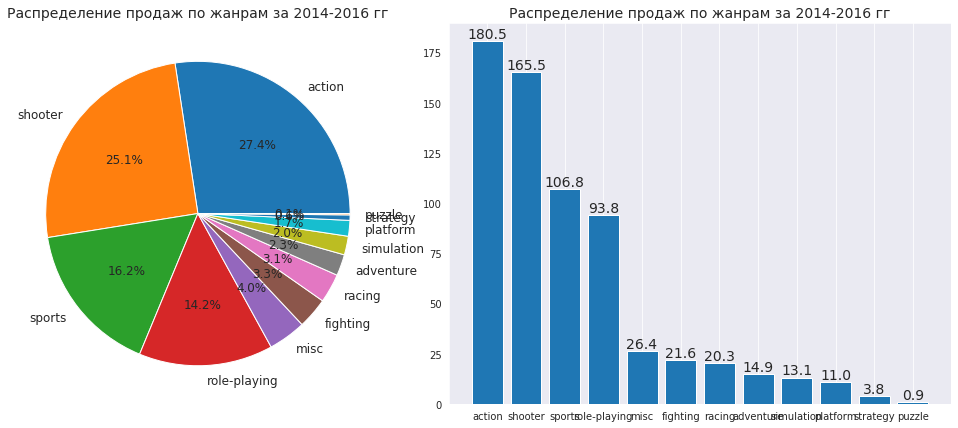

In [35]:
# визуализируем распределение продаж по жанрам
genre_group_sales = actual_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 7)
plt.subplots_adjust(wspace=0)

ax[0].pie(genre_group_sales, labels=genre_group_sales.index, autopct='%1.1f%%', textprops={'size': 12})
ax[0].set_title('Распределение продаж по жанрам за 2014-2016 гг', fontsize=14)
    
ax[1].bar(genre_group_sales.index, genre_group_sales)
ax[1].set_title('Распределение продаж по жанрам за 2014-2016 гг', fontsize=14)
ax[1].grid(axis='y')
for i, sales in enumerate(genre_group_sales):
    ax[1].text(i, sales+1.5, round(sales, 1), horizontalalignment='center', fontsize=14)

In [36]:
genre_group_sales

genre
action         180.510
shooter        165.470
sports         106.810
role-playing    93.820
misc            26.370
fighting        21.650
racing          20.330
adventure       14.860
simulation      13.080
platform        11.030
strategy         3.780
puzzle           0.930
Name: total_sales, dtype: float64

Из графиков видим, что экшены и шутеры лидеры, на которые приходится больше половины всех продаж. Среди популярных жанров спортивные и ролевые игры - на них приходится треть продаж за последние годы.

### Распределение продаж по регионам и платформам<a id='section_11'></a>
[к плану исследования](#section_0)

In [37]:
# построим вспомогательные фреймы
# фрейм для определения топовых платформ
region_df = actual_df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']].sum()
# фрейм для определения топовых жанров
genre_region_df = actual_df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
# фрейм для определения влияние рейтинга ESRB на продажи
rating_region_df  = actual_df.query('rating != 0').groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

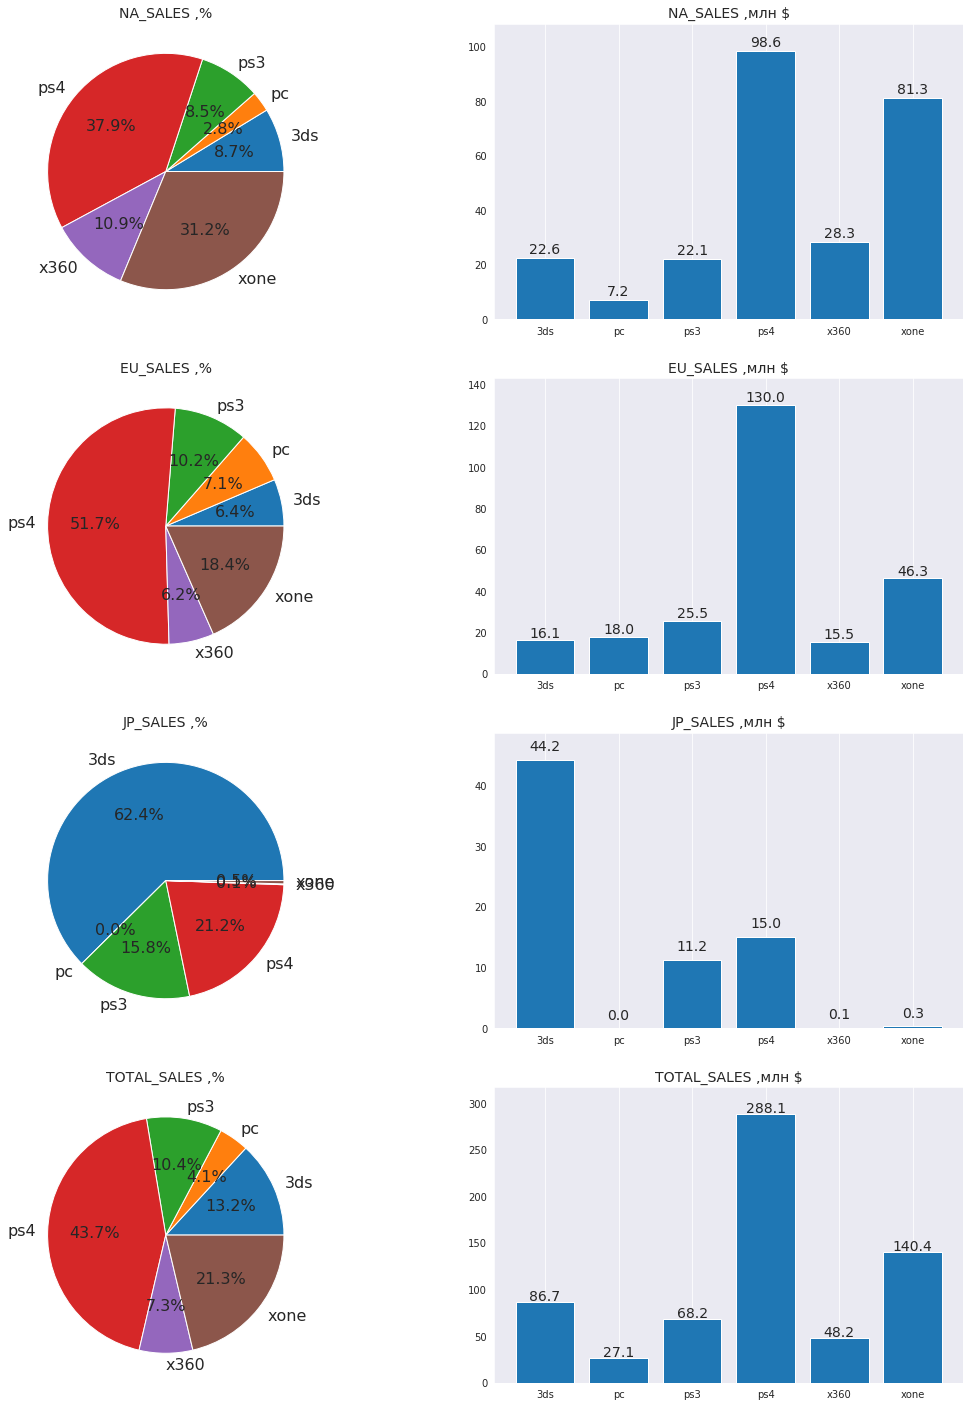

In [38]:
# посмоттрим на распределение продаж игр на топовых платформах и их доли
fig, ax = plt.subplots(4,2)
fig.set_size_inches(18.5, 25)
ax = ax.flatten()

n=0

for col in list(region_df):
    ax[n].pie(region_df[col], labels=region_df.index, autopct='%1.1f%%', textprops={'size': 16})
    ax[n].set_title(col.upper()+' ,%', fontsize=14)
    n += 1
    
    ax[n].bar(region_df.index, region_df[col])
    ax[n].set_title(col.upper()+' ,млн $', fontsize=14)
    ax[n].grid(axis='y')
    ax[n].set_ylim(0, max(region_df[col])*1.1)
    for i, sales in enumerate(region_df[col]):
        ax[n].text(i, sales+1.5, round(sales, 1), horizontalalignment='center', fontsize=14)
    n += 1

Для каждого региона характерны популярность разных платформ. Так, если в Европе и Америке лидирующей является PS4 (на них приходится 38% и 52% всех продаж соответственно), то в Японии с подавляющим перевесом на первом месте 3ds - 62,4% от всех продаж. Более того, в Японии по сути распространены всего 3 платформы (3ds, ps4, ps3). 

Продажи игр на XOne существенно ниже PS4 на мировом рынке за исключением Северной Америки. Здесь эти две платформы находятся рядом по объемам продаж в последние годы - XOne уступат PS4 менее 7% (общая доля от продаж в Северной Америке за 3 года - 31%).

Посмотрим есть ли характерные различия в популярности жанров в зависимости от региона.

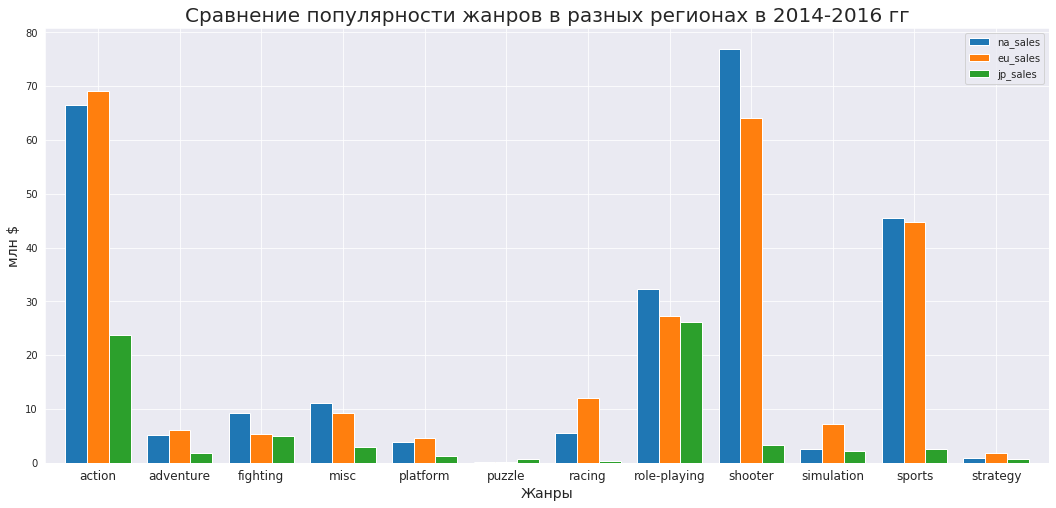

In [39]:
# посмоттрим на распределение продаж игр топовых жанров
genre_region_df.plot(kind='bar', figsize=(18, 8), width = 0.8, grid=True)
plt.title('Сравнение популярности жанров в разных регионах в 2014-2016 гг', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.xlabel('Жанры', fontsize=14)
plt.ylabel('млн $', fontsize=14)
plt.show()

In [40]:
genre_region_df.sort_values(by='na_sales', ascending=False)

,na_sales,eu_sales,jp_sales
genre,,,
shooter,76.970,64.080,3.330
action,66.530,69.110,23.790
sports,45.510,44.660,2.540
role-playing,32.220,27.200,26.210
misc,11.190,9.200,2.900
fighting,9.240,5.260,4.930
racing,5.590,11.970,0.390
adventure,5.240,6.180,1.770
platform,3.890,4.530,1.320


Построив распределение продаж по жанрам в разрезе регионов, видим, что в Европе и Америке схожие предпочтения. ТОП-4 жанра в этих регионах: экшены, шутеры, спортивные симуляторы, ролевые игры. В Европе пятым по популярности является жанр гоночных симуляторов, в то время как в Америке - это Miscellaneous games(разные игры, не подходящие под другие категории).

Япония в плане предпочтений и здесь стоит особняком - экшены и ролевые игры здесь популярны практически на равне и лидируют с заметным отрывом от остальных жанров. Замыкают ТОП-5 жанров в Японии файтинг, шутеры и Misc. Но продаются такие игры в 6-7 раз меньше игр двух самых популярных жанров в этой стране.

### Оценка влияния рейтинга ESRB на продажи в регионах<a id='section_12'></a>
[к плану исследования](#section_0)

In [41]:
rating_region_df

,na_sales,eu_sales,jp_sales
rating,,,
E,42.510,51.650,5.470
E10+,25.550,19.030,2.370
M,95.200,92.500,7.030
T,36.550,32.270,10.360


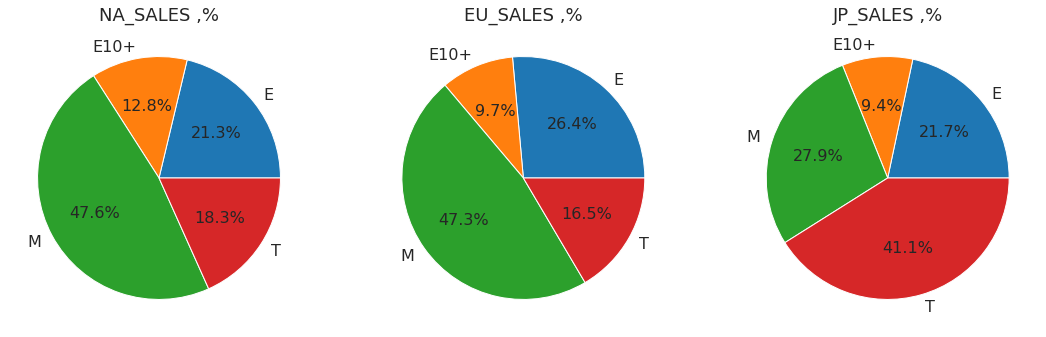

In [42]:
# посмотрим какие доли продаж игр по категориям рейтинга ESRB
fig, ax = plt.subplots(1,3)
fig.set_size_inches(18.5, 25)

n=0

for col in list(rating_region_df):
    ax[n].pie(rating_region_df[col], labels=rating_region_df.index, autopct='%1.1f%%', textprops={'size': 16})
    ax[n].set_title(col.upper()+' ,%', fontsize=18)
    n += 1

В Европе и Америке преобладают игры для взрослых (M - Mature). 

Япония и здесь стоит особняком - здесь преобладают продажи игр с рейтингом для подростков (T- teenage).

### Портрет пользователя<a id='section_13'></a>
[к плану исследования](#section_0)

Таким образом, на основе анализа данных продаж в по жанрам/платформам/возрастного рейтинга, можем составить примерный портрет пользователя для каждого и 3-х регинонов:

#### Cеверная Америка
Пользователи:
- Предпочитающие последние версии PlayStation и XBox (платформы PS4 и XOne)
- Отдающие предпочтение играм для взрослых 18+ в жанрах шутеры и экшены.

#### Европа
Очень схожа по предпочтениям с Америкой с незначительными отличиями. Пользователи:
- В большинстве случаев отдают предпочитают также PlayStation (XBox популярен гораздо в меньшей степени)
- Также отдают предпочтение играм для взрослых 18+ в жанрах шутеры и экшены.

#### Япония
Страна со своей культурой компьютерных игр, кардинально отличающейся от Америки и Европы. Здесь пользователи:
- В основном предпочитают портативную игровую платформу Nintendo 3ds. На PlayStation играет каждый третий геймер.
- В основном играют в игры для подростков.

### Статистическая проверка гипотез<a id='section_14'></a>
[к плану исследования](#section_0)

In [43]:
# сформируем отдельные фреймы с необходимой выборкой для проверки гипотез
user_score_xone = actual_df.query("user_score > 0 and platform == 'xone'")['user_score']
user_score_pc = actual_df.query("user_score > 0 and platform == 'pc'")['user_score']

In [44]:
std_lambda = lambda x: x.std(ddof=1)
std_lambda.__name__ = 'std'
var_lambda = lambda x: x.var(ddof=1)
var_lambda.__name__ = 'var'

In [45]:
# выведем таблицу в разрезе групп регионов со статистическими показателями для предварительной оценки
user_score_stat = actual_df.\
                        query("platform == 'xone' or platform == 'pc' and user_score > 0").\
                        pivot_table(columns='platform', 
                        values=['user_score'], 
                        aggfunc=['mean', 'median', 'std', 'var'])

user_score_stat

mean        median         std            var        
platform       pc   xone     pc xone     pc   xone      pc    xone
user_score 63.000 55.311     68   66 16.964 28.093 287.770 789.220

In [46]:
# Проверим гипотезу
# h0 - средние пользовательские оценки для платформ XOne и PC одинаковые
# h1 - средние пользовательские оценки для платформ XOne и PC разные

#критичсекий уровень значимости
alpha = .05

result = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.042438365597203175
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что различие средних пользовательских оценок для рассматриваемых платформ с вероятнстью почти 96% не случайно и считается статистически значимым. Поэтому мы вынуждены отвергнуть нулевую гипотезу. Т.к. дисперсии двух выборок отличаются, параметр equal_var указали как False.

На основании расчетов выше заметно, что средние пользовательские оценки почти на 8 пунков ниже чем на PC. 

In [47]:
# сформируем отдельные фреймы с необходимой выборкой для проверки гипотез
user_score_action = actual_df.query("user_score > 0 and genre == 'action'")['user_score']
user_score_sports = actual_df.query("user_score > 0 and genre == 'sports'")['user_score']

In [48]:
user_score_action_sports = actual_df.\
                                query("genre == 'action' or genre == 'sports' and user_score > 0").\
                                    pivot_table(columns='genre', 
                                    values=['user_score'], 
                                    aggfunc=['mean', 'std', 'var'])

user_score_action_sports

mean           std             var        
genre      action sports action sports   action  sports
user_score 42.076 51.769 34.367 18.105 1181.092 327.803

In [49]:
# Проверим гипотезу
# h0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
# h1 - Средние пользовательские рейтинги жанров Action и Sports разные

#критичсекий уровень значимости
alpha = .05

result = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.657526980916934e-16
Отвергаем нулевую гипотезу


Полученное значение pvalue стремится к нулю, что говорит нам о том, что вероятность получить такое различие двух генеральных совокупностей случайно практически невозможно. Различия средних двух генеральных совокупностей статистически значими.

При таких раскладах получаем практичски 100%-ю вероятность, что такое различие средних двух ген.совокупностей не случайно. Т.к. дисперсии двух выборок отличаются, параметр equal_var указали как False.

Расчеты также указывают на различия средних значений. Пользовательские оценки спортивных игр почти на 10 пунктов выше оценок Экшенов.

### Вывод<a id='section_15'></a>
[к плану исследования](#section_0)

Проверка гипотез показала, что пользователи по разному оценивают игры в зависимости от платформы игры или жанра. Возможно, это связано с техническими особенностями конкретной платформы, а возможно различия оценок обусловлены различиями самих пользователей по демографическим признакам, интересам и т.п. Так или иначе мы выяснили, что планирование вывода на рынок новых продуктов требует разных подходов и учета множества факторов.

Также мы понимаем, что есть очевидные различия в предпочтениях по географическому признаку. Если Европа и Америка очень схожи по своим предпочтениям и игр, и платформ, то в случае с Японией наблюдаем характерные отличия и в плане предпочтений по игровым платформам, и в плане игровых жанров. Это лишний раз указывает на необходиомость применения разных подходов, в том числе и в планировании рекламных кампаний.

Из проведенного исследования мы выяслнили, что сейчас наиболее популярными плаформами сейчас являются платформы для игровых консолей PlayStation и XBox: PS4 и XOne пришли на смену PS3 / X360. 

В Японии можно отметить высокую степень доверия к собственным разработкам: это портативаня консоль Nintendo 3ds и PlayStation 4.Около 99% всех продаж в период с 2014 по 2016 гг приходится именно на игры для Nintendo и PlayStation, причем на игры для Nintendo 3ds приходится 62% продаж, что явно выделяет Япониию на фоне глобального рынка гейминдустрии.

Среди прочих результатов анализа выделим следующее:
- на всех топовых платформах есть ряд популырных игр, которые выбиваются из общей массы и демоснтрируют высокие продажи.
- В Европе и Америке преобладают игры с возрастным рейтингом 18+, в Японии - для подростков.
- ТОП-4 жанра игр, обеспечивающие 80% глобальных продаж: Экшены(27%), Шутеры(25%), Спортивные(16%) и Ролевые игры(14%).
- влиение отзывов пользователей на продажи минимальное или отсутсвующее, в то время как мнение критиков более авторитетно и показывает наличие взаимосвязи с объемом продаж. Можем предположить, что экспертная оценка является более квалифицированной и/или авторитетной.